In [30]:
import splat
from astropy.io import fits
import astropy.units as u
import pandas
import numpy
import matplotlib.pyplot as plt
splat.initializeStandards()

par191-00077  best template  T0.0 0.5
par191-00077  average template  T0.0: 1.8311435901041888
par191-00077  allers indices  M8.0:: 2.5260201575092216
par191-00077  burgasser indices  T1.8 0.6047629340921383
par222-00091  best template  M7.0 0.5
par222-00091  average template  L0.0: 1.699199099024664
par222-00091  allers indices  M7.9:: 2.656216452796665
par222-00091  burgasser indices  L8.6:: 3.7270831565491926
par468-00163  best template  T3.0 0.5
par468-00163  average template  T3.0: 1.3596911321608964
par468-00163  allers indices  M9.6:: 2.682821752379719
par468-00163  burgasser indices  T3.7 0.5430726730102263


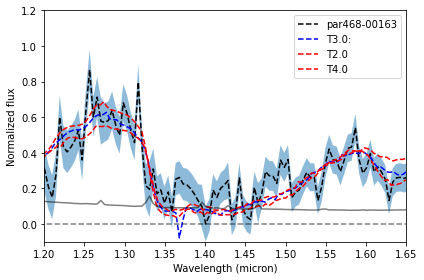

In [39]:
folder = '/Users/adam/papers/wisp/'
files = ['par191-00077.csv','par222-00091.csv','par468-00163.csv']
wrng = [[1.2,1.35],[1.45,1.65]]
for f in files:
    name = f.split('.')[0]
    dp = pandas.read_csv(folder+f,delimiter=',')
    sp = splat.Spectrum(wave=dp['wave']*u.micron,flux=dp['flux'],noise=dp['noise'],name=name)
    sp.normalize()
    spt,spt_e = splat.classifyByStandard(sp,fit_ranges=wrng)
    print(name,' best template ',spt,spt_e)
    spt1,spt1_e = splat.classifyByStandard(sp,fit_ranges=wrng,average=True)
    print(name,' average template ',spt1,spt1_e)
    spt,spt_e = splat.classifyByIndex(sp,set='allers')
    print(name,' allers indices ',spt,spt_e)
    spt,spt_e = splat.classifyByIndex(sp,set='burgasser')
    print(name,' burgasser indices ',spt,spt_e)

    plt.clf()
    plt.plot(sp.wave,sp.flux,'k--')
    ref = splat.typeToNum(numpy.round(splat.typeToNum(spt1)))
    chi,scl = splat.compareSpectra(sp,splat.STDS_DWARF_SPEX[ref])
    splat.STDS_DWARF_SPEX[ref].scale(scl)
    plt.plot(splat.STDS_DWARF_SPEX[ref].wave,splat.STDS_DWARF_SPEX[ref].flux,'b--')
    ref = splat.typeToNum(numpy.round(splat.typeToNum(spt1)+spt1_e))
    chi,scl = splat.compareSpectra(sp,splat.STDS_DWARF_SPEX[ref])
    splat.STDS_DWARF_SPEX[ref].scale(scl)
    plt.plot(splat.STDS_DWARF_SPEX[ref].wave,splat.STDS_DWARF_SPEX[ref].flux,'r--')
    ref = splat.typeToNum(numpy.round(splat.typeToNum(spt1)-spt1_e))
    chi,scl = splat.compareSpectra(sp,splat.STDS_DWARF_SPEX[ref])
    splat.STDS_DWARF_SPEX[ref].scale(scl)
    plt.plot(splat.STDS_DWARF_SPEX[ref].wave,splat.STDS_DWARF_SPEX[ref].flux,'r--')
    plt.legend([name,spt1,splat.typeToNum(numpy.round(splat.typeToNum(spt1)-spt1_e)),splat.typeToNum(numpy.round(splat.typeToNum(spt1)+spt1_e))])
    plt.plot(sp.wave,sp.noise,'k-',alpha=0.5)
    plt.fill_between(sp.wave,sp.flux.value+sp.noise.value,sp.flux.value-sp.noise.value,alpha=0.5)
    plt.plot(sp.wave,numpy.zeros(len(sp.wave)),'k--',alpha=0.5)
    plt.xlim([numpy.nanmin(wrng),numpy.nanmax(wrng)])
    plt.ylim([-0.1,1.2])
    plt.xlabel('Wavelength (micron)')
    plt.ylabel('Normalized flux')
    plt.tight_layout()
    plt.savefig('classify_{}.pdf'.format(name))


In [14]:
splat.classifyByStandard?

In [38]:
numpy.round(3.4)

3.0